In [ ]:
import pandas as pd
import numpy as np

LAW OF LARGE NUMBERS:[link text](https://)
as the sample size increase the sample mean will approches the mean of true samples.

true population: the orginal sample size which probabily very large, cant compute prob and mean or any other operartion

sample population: the random samples from the true population.which is we are yet to collect from the true sample.

observed population: sample population which is collected from the true population. both sample and observed population is similar but not same.

key diff: sample population is assumed before collection. observed population after collection

below are the experiment for that....

In [ ]:
df = pd.DataFrame({'Trials': np.arange(3000),
                  'Outcomes': np.random.choice(['Head','Tail'],3000)})

In [ ]:
df.tail()

,Trails,Outcomes
2995,2995,Head
2996,2996,Tail
2997,2997,Head
2998,2998,Tail
2999,2999,Head


In [ ]:
sample_population = df.sample(2000)

In [ ]:
sample_population

,Trails,Outcomes
188,188,Tail
2117,2117,Tail
669,669,Head
377,377,Tail
1162,1162,Tail
...,...,...
1022,1022,Tail
871,871,Head
244,244,Head
2006,2006,Head


In [ ]:
results = []

In [ ]:
def prob(df):
  s = len(df)
  success = df['Outcomes'].loc[df['Outcomes']=='Head'].count()
  results.append(float(success/s))
  return f'probability of head when sample size is {s} are {success/s}'

In [ ]:
#true sample size
print(prob(df))

probability of head when sample size is 3000 are 0.49133333333333334


In [ ]:
#when sample size increase to 10
print(prob(df.sample(10)))

probability of head when sample size is 10 are 0.6


In [ ]:
#when sample size increase to 100
print(prob(df.sample(100)))

probability of head when sample size is 100 are 0.62


In [ ]:
#when sample size increase to 1000
print(prob(df.sample(1000)))

probability of head when sample size is 1000 are 0.485


In [ ]:
#when sample size increase to 2000
print(prob(df.sample(2000)))

probability of head when sample size is 2000 are 0.498


In [ ]:
print(prob(df.sample(2500)))

probability of head when sample size is 2500 are 0.4928


In [ ]:
results

[0.49133333333333334, 0.6, 0.62, 0.485, 0.498, 0.4928]

In [ ]:
sample_size = [10,100,1000,2000,2500]

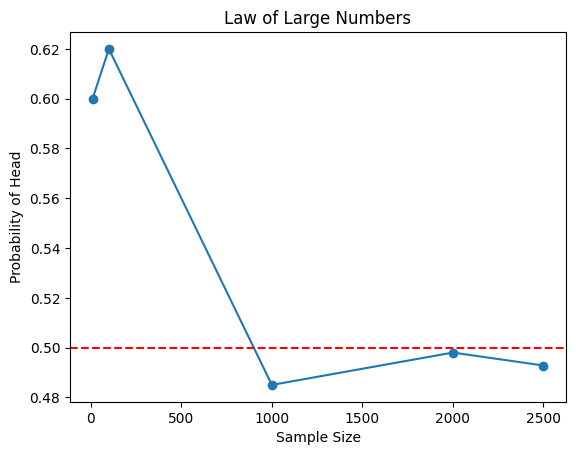

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sample_size,results[1:],marker = 'o',label='estimated probability of head')
plt.axhline(0.5,color='red',linestyle='--',label='expected success of head when coin is not biased')
plt.xlabel('Sample Size')
plt.ylabel('Probability of Head')
plt.title('Law of Large Numbers')
plt.show()

as we can see sample size increase the observed population approches true populations mean.

to test the validness of this test lets go a step further do some experiment.
Let's see the average result of each observed population. because we are only taking 1(n samples) random sample at a time which varies as per the randomness.by taiking the average of each trail we will get curated results.

In [ ]:
avg_res = []
std = []

In [ ]:
def estimate_prob(df,n,trails = 50):
  result = []
  for _ in range(trails):
    sample_population = df.sample(n)
    s = len(sample_population)
    success = sample_population['Outcomes'].loc[sample_population['Outcomes']=='Head'].count()
    result.append(float(success/s))

  avg_res.append(np.mean(result))
  std.append(np.std(result))
  return f'probability of head when sample size is {s} are {np.mean(result)}'

In [ ]:
print(estimate_prob(df,10))

probability of head when sample size is 10 are 0.47600000000000003


In [ ]:
print(estimate_prob(df,100))

probability of head when sample size is 100 are 0.5064


In [ ]:
print(estimate_prob(df,1000))

probability of head when sample size is 1000 are 0.4907


In [ ]:
print(estimate_prob(df,2000))

probability of head when sample size is 2000 are 0.49028


In [ ]:
print(estimate_prob(df,2500))

probability of head when sample size is 2500 are 0.49112799999999995


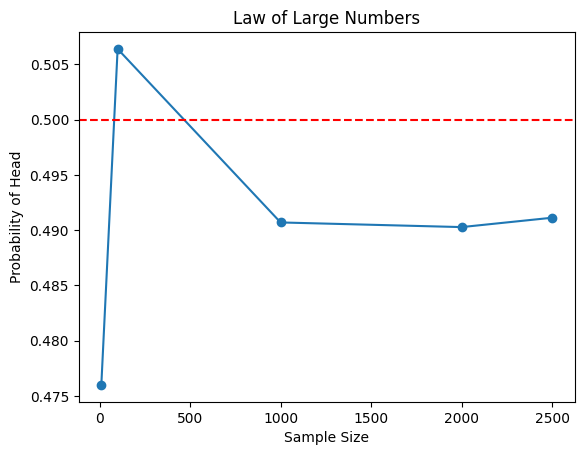

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sample_size,avg_res,marker = 'o',label='estimated probability of head')
plt.axhline(0.5,color='red',linestyle='--',label='expected success of head when coin is not biased')
plt.xlabel('Sample Size')
plt.ylabel('Probability of Head')
plt.title('Law of Large Numbers')
plt.show()

from this experiment we can clearly see, As we increase sample size, the estimated probability stabilizes near 0.5, demonstrating LLN

LLN underpins why we can trust sample statistics (e.g., survey results).

In A/B testing, it explains why large experiments give more reliable conversion rate estimates.

In machine learning, it justifies why more data → more stable estimates of model performance.

now lets see the error

Text(0.5, 1.0, 'Law of Large Numbers')

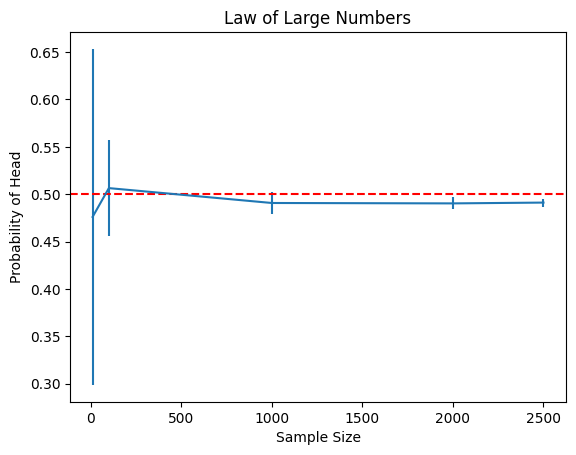

In [ ]:
plt.errorbar(sample_size,avg_res,yerr=std,label='Estimated Probability of Head')
plt.axhline(0.5,color='red',linestyle='--',label='Expected Success of Head when Coin is Not Biased')
plt.xlabel('Sample Size')
plt.ylabel('Probability of Head')
plt.title('Law of Large Numbers')

by looking at the result as you can clearly see as the sample size increase the error are also decrease because of the CLT